In [10]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
import random
import sys

In [11]:
# Build the SparkSession
spark = SparkSession.builder \
    .master("local[6]") \
    .appName("Data exploration URL") \
    .config("spark.executor.memory", "4gb") \
    .getOrCreate()

sc = spark.sparkContext

In [12]:
sc._conf.getAll()

[('spark.executor.memory', '4gb'),
 ('spark.app.id', 'local-1615403321996'),
 ('spark.driver.memory', '4g'),
 ('spark.rdd.compress', 'True'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.submit.pyFiles', ''),
 ('spark.executor.id', 'driver'),
 ('spark.submit.deployMode', 'client'),
 ('spark.app.name', 'Data exploration URL'),
 ('spark.driver.port', '36979'),
 ('spark.ui.showConsoleProgress', 'true'),
 ('spark.master', 'local[6]'),
 ('spark.driver.host', 'fedora')]

In [13]:
# Load training data
data = spark.read.format("libsvm")\
    .load("../data/url_svmlight/Dimension_100_x_500000.svm")
# Split the data into train and test
seed = random.randrange(500, 1300, 2)
splits = data.randomSplit([0.6, 0.4], seed)

train = splits[0]
test = splits[1]

<AxesSubplot:>

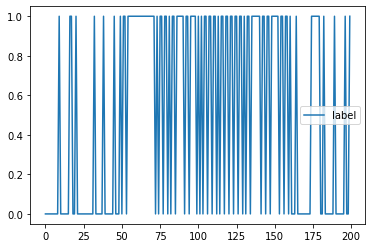

In [37]:
df = data.toPandas()
df.plot()

In [38]:
from sklearn.neighbors import NearestNeighbors

In [39]:
data.cache()

vecsCollected = data.cache()
knnobj = NearestNeighbors().fit(vecsCollected)
bc_knnobj = sc.broadcast(knnobj)

results = data.map(lambda x: bc_knnobj.value.kneighbors(x))

ValueError: Expected 2D array, got scalar array instead:
array=DataFrame[label: double, features: vector].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.